In [1]:
from manim import *
import matplotlib.pyplot as plt
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching oszillation_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s oszillation_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.8


Output saved by overwring previous file at oszillation_sensor/OS.mp4.


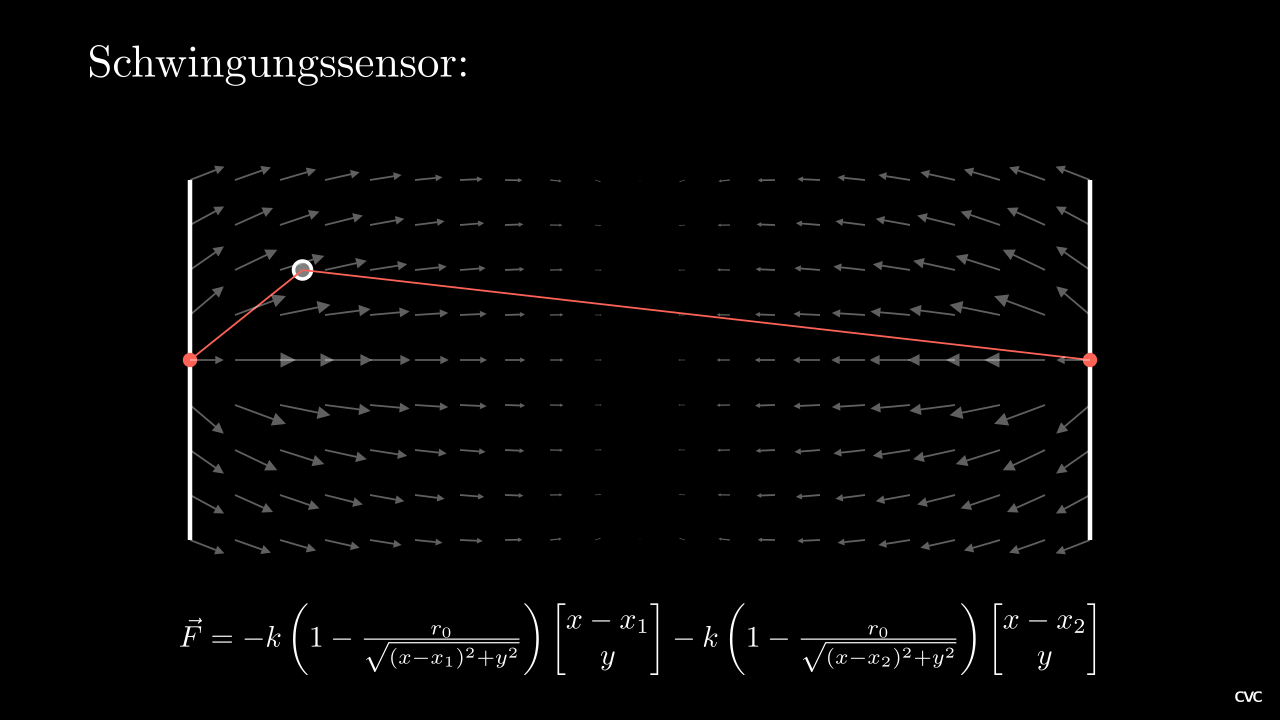

In [43]:
%%capture_video --path "oszillation_sensor/OS.mp4"
%%manim -qm --fps 60 $video_scene


# Processing data
A14_Schwingungssensor_fancy_pos_data = np.loadtxt("A14_Schwingungssensor_fancy_pos.csv", delimiter = ",", skiprows = 1)

x1_array = 5 * A14_Schwingungssensor_fancy_pos_data[::10,1]
y1_array = 5 * A14_Schwingungssensor_fancy_pos_data[::10,2]

x1_iter = iter(x1_array)
y1_iter = iter(y1_array)


# Force Field
x0 = -5             # x-Position des 1. Aufhängpunktes
x1 = 5              # x-Position des 2. Aufhängpunktes
r0 = 5              # Ruhelänge
k = 0.1             # Federkonstante
smoothing_factor = 1e-10


def F(pos):
    pos = pos / 2   
    force_left = -k * ( (np.sqrt((pos[0]-x0)**2 + pos[1]**2) - r0) / (np.sqrt((pos[0]-x0)**2 + pos[1]**2) + smoothing_factor) ) * ((pos[0]-x0) * RIGHT + pos[1] * UP )
    force_right = -k * ( (np.sqrt((pos[0]-x1)**2 + pos[1]**2) - r0) / (np.sqrt((pos[0]-x1)**2 + pos[1]**2) + smoothing_factor) ) * ((pos[0]-x1) * RIGHT + pos[1] * UP )
    return force_left + force_right


class oszillation_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC) 


        # Headline
        text_oszi = Tex(r"Schwingungssensor:", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)  
        eq_field = Tex(
            r"$\Vec{F}=-k\left(1-\frac{r_0}{\sqrt{(x-x_1)^2+y^2}}\right)\begin{bmatrix} x-x_1 \\ y \end{bmatrix}-k\left(1-\frac{r_0}{\sqrt{(x-x_2)^2+y^2}}\right)\begin{bmatrix} x-x_2 \\ y \end{bmatrix}$", 
            color = WHITE, font_size = 32).align_on_border(DOWN + LEFT, buff = 0.5).shift(1.5 * RIGHT)  

        mass1 = Circle(color = WHITE, radius = 0.1, fill_color = WHITE, fill_opacity = 0.5).move_to([x1_array[0], y1_array[0], 0])
        line_A = Line([-5, -2, 0], [-5, 2, 0], color = WHITE, stroke_width = 5)
        line_B = Line([5, -2, 0], [5, 2, 0], color = WHITE, stroke_width = 5)

        A = Dot([-5, 0, 0], color = RED)
        B = Dot([5, 0, 0], color = RED)

        connec_A = Line([-5, 0, 0], [x1_array[0], y1_array[0], 0], color = RED, stroke_width = 2)
        connec_B = Line([5, 0, 0], [x1_array[0], y1_array[0], 0], color = RED, stroke_width = 2)


        avf = ArrowVectorField(
            F, x_range = [-10, 10, 1], y_range = [-4, 4, 1], length_func = lambda x: 1.5*x, 
            colors = [WHITE], opacity = 0.375, vector_config = {'stroke_width': 2}).scale(0.5)

        def mass_updater(mass):
            x_mass = next(x1_iter)
            y_mass = next(y1_iter)
            self.add(Line(start = mass.get_center(), end = [x_mass, y_mass, 0], stroke_width = 0.5, color = WHITE).set_opacity(0.5))
            connec_A.become(Line([-5, 0, 0], [x_mass, y_mass, 0], color = RED, stroke_width = 2))
            connec_B.become(Line([5, 0, 0], [x_mass, y_mass, 0], color = RED, stroke_width = 2))
            mass.move_to([x_mass, y_mass, 0])



        self.add(text_oszi, mass1, line_A, line_B, A, B, connec_A, connec_B, avf)
        self.add(eq_field)
        # self.play(FadeIn(mass1), FadeIn(line_A), FadeIn(line_B), FadeIn(A), FadeIn(B), FadeIn(connec_A), FadeIn(connec_B), run_time = 1.5)
        # self.wait(1)
        # mass1.add_updater(mass_updater)

        # timeline = ValueTracker(0)
        # self.play(timeline.animate.set_value(10), rate_func = linear, run_time = 20)
        # self.wait(3)